<a href="https://colab.research.google.com/github/johnatanDM/MachineLearning/blob/main/Alura_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
caminho_arquivo = "https://github.com/alura-cursos/alura-clustering-validation/raw/base-de-dados/CC%20GENERAL.csv"
df = pd.read_csv(caminho_arquivo)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
#pre-processamento 
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [5]:
missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [6]:
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [7]:
#normalizando os dados
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [8]:
#clusterizando
from sklearn.cluster import KMeans
agrupador_kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = agrupador_kmeans.fit_predict(values)

In [9]:
#validação
from sklearn.metrics import silhouette_score
labels = agrupador_kmeans.labels_
silhueta = silhouette_score(values, labels, metric='euclidean')
print(silhueta)

0.3644635747161945


In [10]:
#Davies-Bouldin
from sklearn.metrics import davies_bouldin_score
dbs = davies_bouldin_score(values, labels)
print(dbs)

1.0758620069408937


In [11]:
#calinski
from sklearn.metrics import calinski_harabasz_score
calinski = calinski_harabasz_score(values, labels)
print(calinski)

3431.7956206905983


In [12]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  labels = kmeans.fit_predict(dataset)
  s = silhouette_score(dataset, labels, metric='euclidean')
  dbs = davies_bouldin_score(dataset, labels)
  calinski = calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski

In [13]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.440519908274


In [14]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3645219978094767 1.0759608810957069 3431.8011174859953


In [15]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.305075270052106 1.1581444021503378 3017.633567932514


In [16]:
s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

0.2912436515546774 1.2345941711675479 2404.792265540407


In [17]:
s5, dbs5, calinski5 = clustering_algorithm(50, values)
print(s5, dbs5, calinski5)

0.25221918690082623 1.2017396754735774 1615.0609147694604


In [18]:
df.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [19]:
import numpy as np
random_data = np.random.rand(8950, 16)
sr, dbsr, calinskir = clustering_algorithm(5, random_data)
print(s2, dbs2, calinski2)
print(sr, dbsr, calinskir)

0.3645219978094767 1.0759608810957069 3431.8011174859953
0.03986817884440237 3.4999633812005593 303.65007839752315


In [20]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbsr1, calinski1 = clustering_algorithm(5, set1)
s2, dbsr2, calinski2 = clustering_algorithm(5, set2)
s3, dbsr3, calinski3 = clustering_algorithm(5, set3)
print("set1", s1, dbsr1, calinski1)
print("set2", s2, dbsr2, calinski2)
print("set3", s3, dbsr3, calinski3)

set1 0.3689276073266749 1.055833259748491 1204.100909435797
set2 0.35406999696241026 1.1389554530299946 1194.945411949724
set3 0.3668447506189662 1.0992311388359748 1167.532949291058


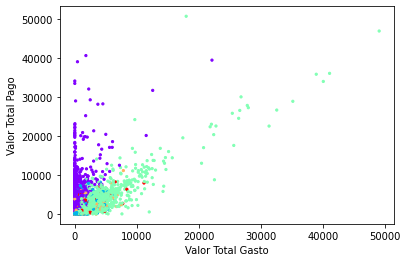

In [21]:
#visualizando os clusters
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor Total Gasto")
plt.ylabel("Valor Total Pago")
plt.show()

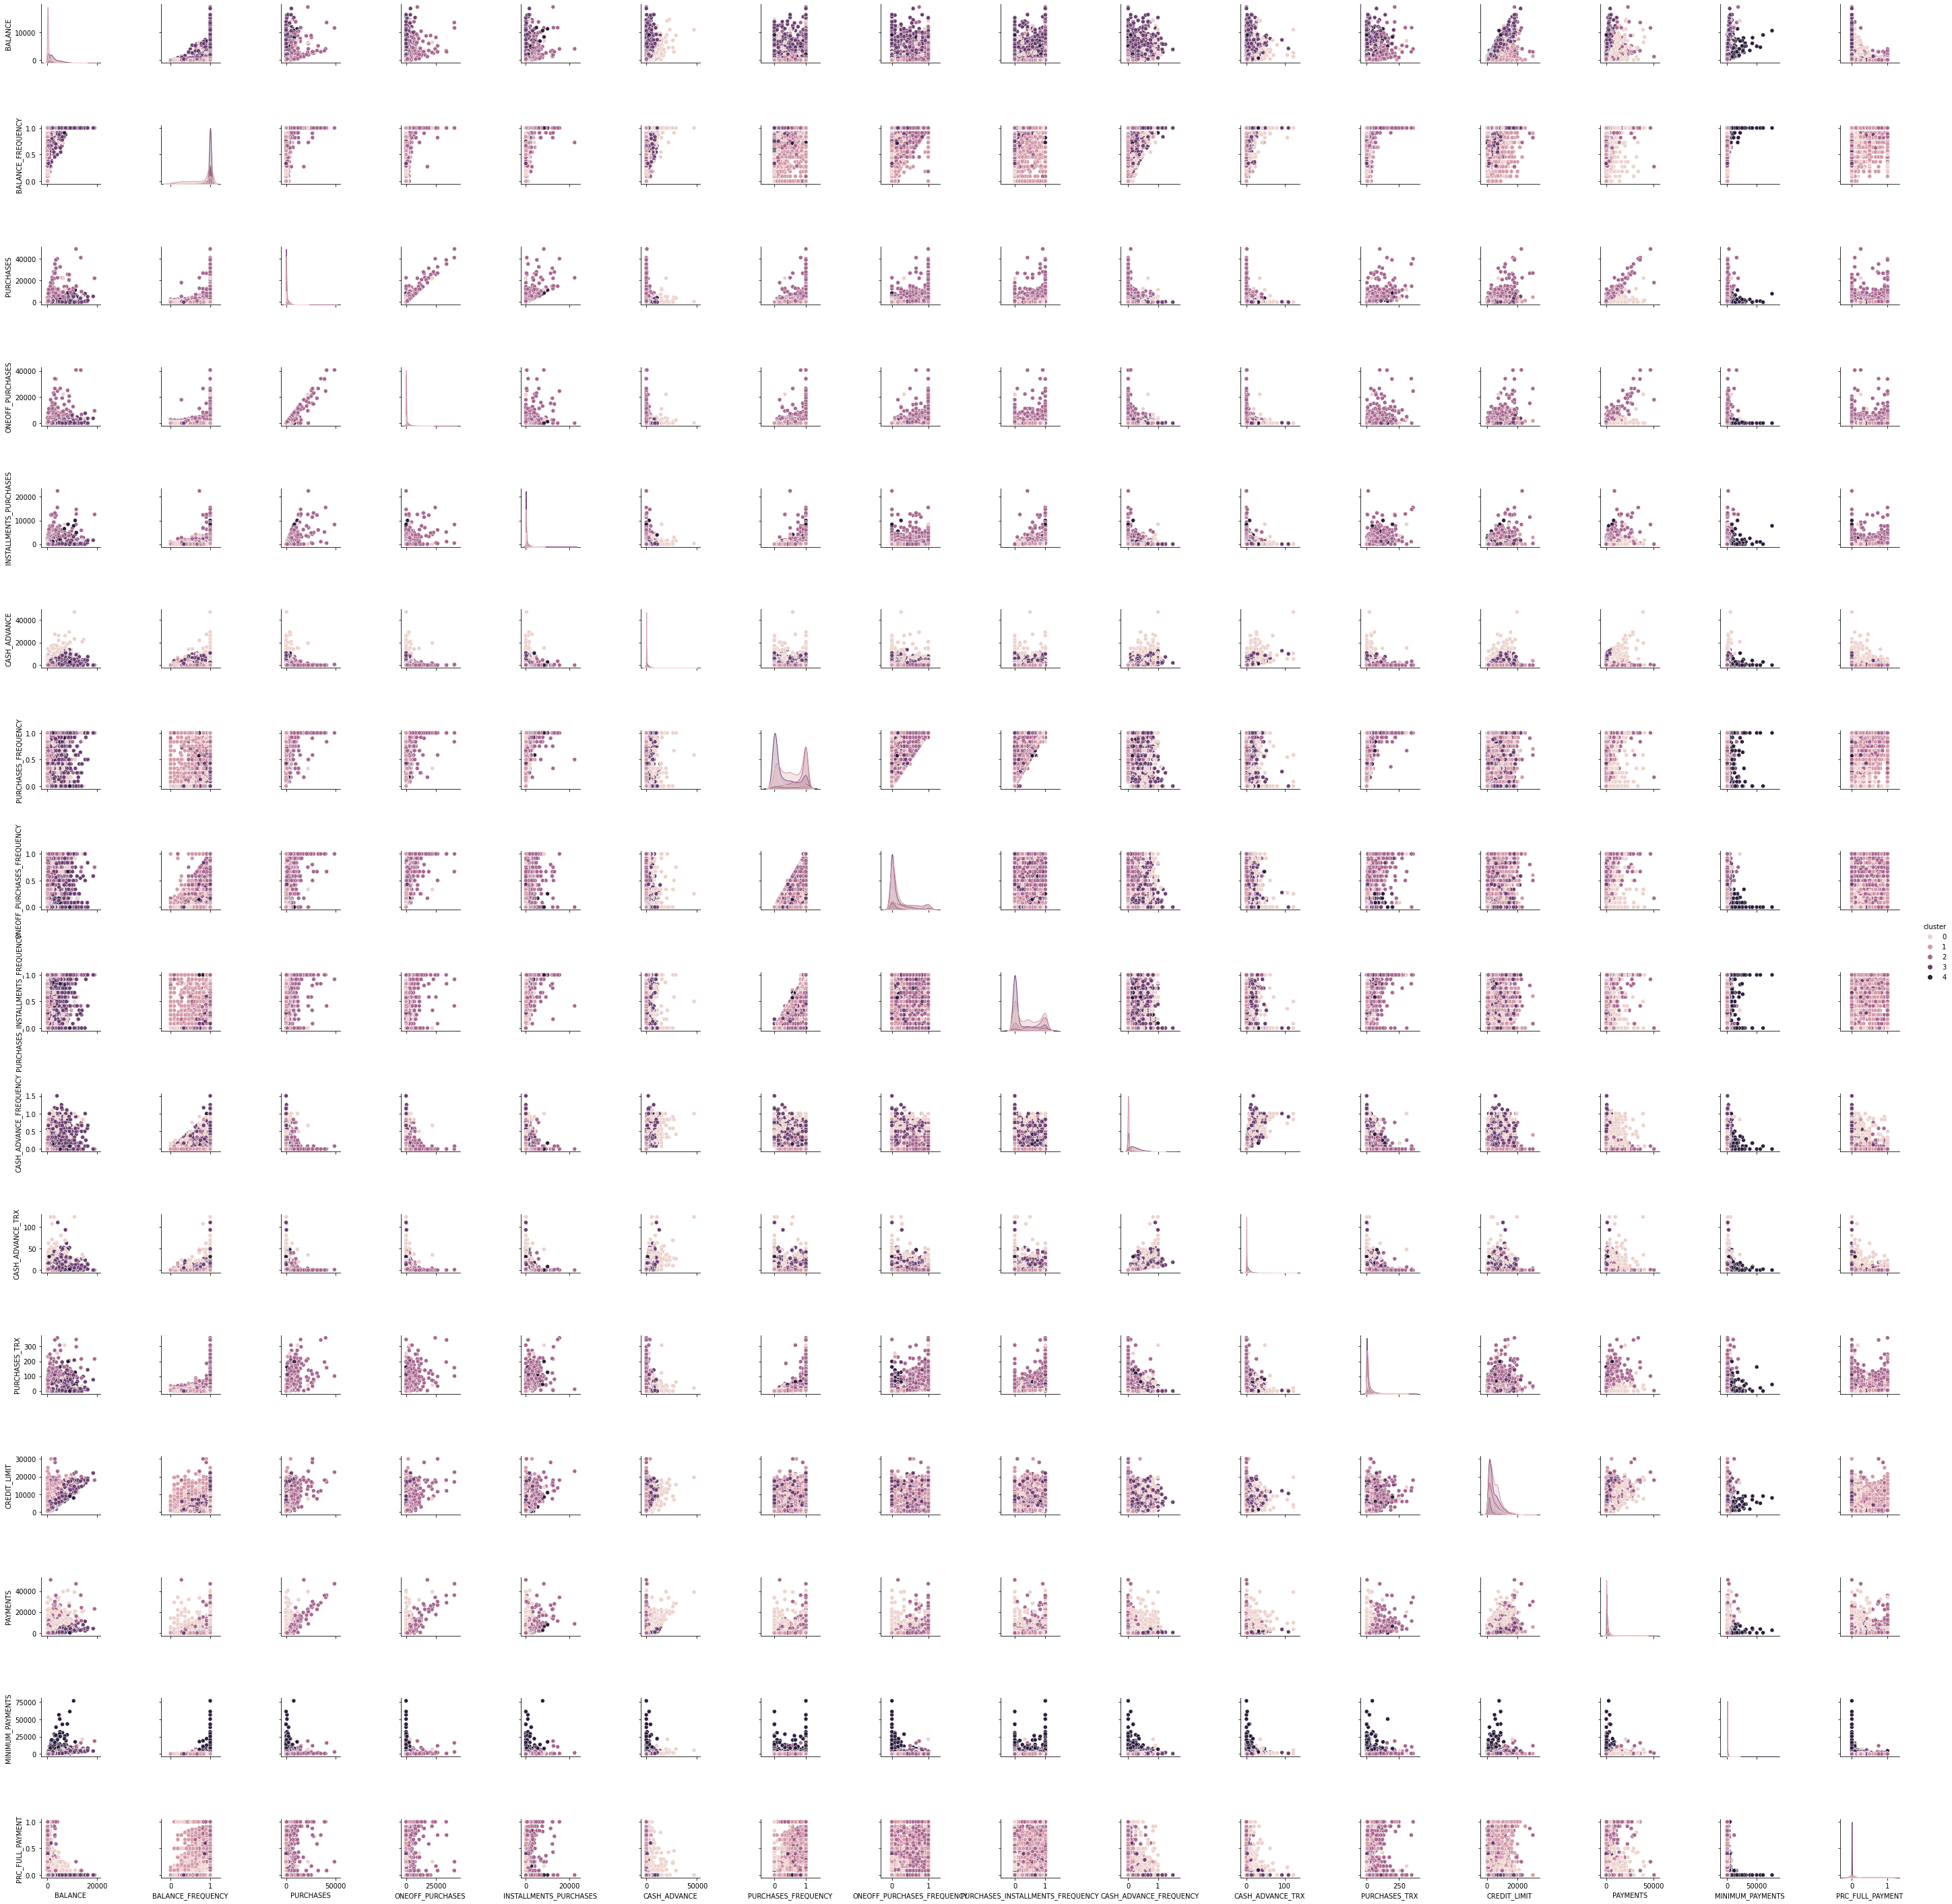

In [22]:
import seaborn as sns
df["cluster"] = labels
sns.pairplot(df[0:], hue="cluster")

In [23]:
df.groupby("cluster").describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0        1073.0  1794.764536  1982.173844  ...         0.083333  0.142857  1.0
1        3278.0   443.992358   846.597972  ...         0.000000  0.444444  1.0
2        1540.0  1142.222657  1664.035755  ...         0.083333  0.545455  1.0
3        2648.0  3038.132314  2479.290949  ...         0.000000  0.000000  0.6
4         411.0  1987.501586  1854.459156  ...         0.000000  0.000000  1.0

[5 rows x 128 columns]

In [24]:
centroids = agrupador_kmeans.cluster_centers_
print(centroids)

[[2.35317569e-01 2.16489198e-04 6.04496610e-02 3.43849416e-02
  2.60699292e-02 4.00329698e-01 5.27098698e-05 2.04691453e-05
  3.52611341e-05 6.55102544e-05 1.57205221e-03 1.12372153e-03
  5.35048542e-01 5.97748295e-01 1.04521037e-01 2.77239617e-05]
 [6.91386971e-02 2.30552524e-04 1.21267798e-01 4.80255998e-02
  7.33425496e-02 2.43607736e-02 1.72581896e-04 3.37097813e-05
  1.40021986e-04 7.93309218e-06 1.24113667e-04 2.86037895e-03
  9.43728649e-01 1.53557708e-01 5.68217245e-02 7.57977264e-05]
 [1.59699490e-01 2.45649360e-04 4.38116859e-01 2.56325660e-01
  1.81962376e-01 2.57889184e-02 2.04826443e-04 8.87914942e-05
  1.51162866e-04 9.36296056e-06 1.69350945e-04 6.17145756e-03
  6.04336246e-01 4.02584838e-01 8.54128174e-02 7.26645255e-05]
 [5.04294070e-01 2.72242076e-04 6.17554553e-02 3.62405829e-02
  2.55365937e-02 2.52765717e-01 6.72943541e-05 2.57072238e-05
  4.50409323e-05 5.74261583e-05 1.15669149e-03 1.33139220e-03
  7.19260678e-01 1.66160406e-01 1.79203910e-01 5.52512128e-07]
 [3.

In [27]:
max = len(centroids[0])
for i in range(max):
  print(df.columns.values[i], "\n{:.4f}".format(centroids[: ,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


BALANCE 0.0224

PURCHASES 0.0196

CASH_ADVANCE 0.0226

CREDIT_LIMIT 0.0360

PAYMENTS 0.0280

In [36]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1794.764536,475.785508,3270.705696,3975.462453,4706.788521,1073
1,443.992358,629.345171,141.569301,5132.945933,814.477150,3278
2,1142.222657,3268.886929,183.019398,4097.701397,3037.241495,1540
3,3038.132314,385.096760,1636.114441,4496.336858,968.599396,2648
4,1987.501586,854.865815,421.129352,2227.737226,1336.238911,411


In [37]:
df.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1073.0,0.117275,0.186801,0.0,0.0,0.083333,0.142857,1.0
1,3278.0,0.246549,0.346601,0.0,0.0,0.000000,0.444444,1.0
2,1540.0,0.278582,0.367203,0.0,0.0,0.083333,0.545455,1.0
3,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
4,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0


CLUSTER 0: Clientes gastam pouco e com maior limite. Pagadores Medianos

CLUSTER 1: Clientes que gastam mais, com foco em saques. Bons Pagadores. Maior número de clientes

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Piores pagadores. Boa quantidade de clientes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.